# Movie Dataset Recommender System 
[Dataset on kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

### Contents
* Data understanding and EDA
* Data preparation 

In [1]:
import pandas as pd
import numpy as np
import ast
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)

# Loading Data

In [2]:
data = pd.read_csv('movies_metadata.csv')

C:\Users\ACER\AppData\Local\Temp\ipykernel_8324\1532675202.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('movies_metadata.csv')


In [3]:
data.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [4]:
data.shape

(45466, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# Removing Duplicated Records

In [6]:
data.duplicated().sum()

13

In [7]:
data = data.drop_duplicates()

In [8]:
data.shape

(45453, 24)

# Data Understanding

In [9]:
def dist_graphs(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 6 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [10]:
columns = data.columns.values

In [11]:
data.nunique()

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

In [12]:
data['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

3 Wrong values for this feature

In [13]:
len(data[data['adult'] == 'True'])

9

In [14]:
data[['belongs_to_collection']].isna().sum() / len(data) * 100

belongs_to_collection    90.112864
dtype: float64

90% missing values

In [15]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')

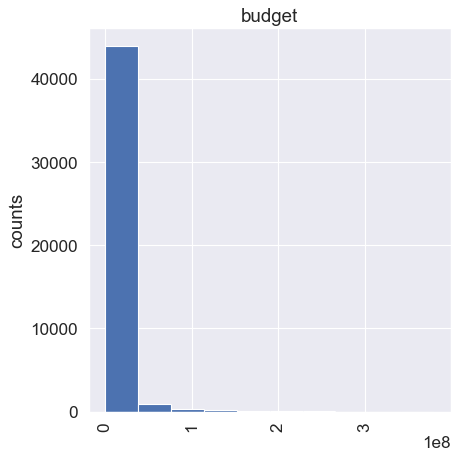

In [16]:
dist_graphs(data[['budget']], 1, 1)

In [17]:
(len(data[data['budget'] == 0]) + len(data[data['budget'].isna()])) / len(data)

0.8044353508019273

80% missing values

In [18]:
data.drop(['budget', 'belongs_to_collection', 'adult'], axis=1, inplace=True)
data.shape

(45453, 21)

In [19]:
data['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [20]:
def json_to_list(row, want='name'):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list, float):
        return (np.nan)
    else:
        inner = []
        for j in new_list:
            inner.append(j[want])
        return (inner)

In [21]:
data[['genres']] = data[['genres']].applymap(json_to_list)
data.head(1)

,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


# All genres of movies

In [22]:
def get_all_items(df, col):
    all_items = {}
    for row in df[col]:
        counter = 0
        if row == np.nan or isinstance(row, float) :
            continue
        for single_value in row:  
            value = all_items.get(single_value)
            if value == None:
                all_items[single_value] = counter + 1
            else:
                all_items[single_value] = value + 1
    return all_items

In [23]:
all_genres = get_all_items(data , 'genres')
len(all_genres)

32

In [24]:
all_genres = dict(sorted(all_genres.items(), key=lambda item: item[1], reverse=True))

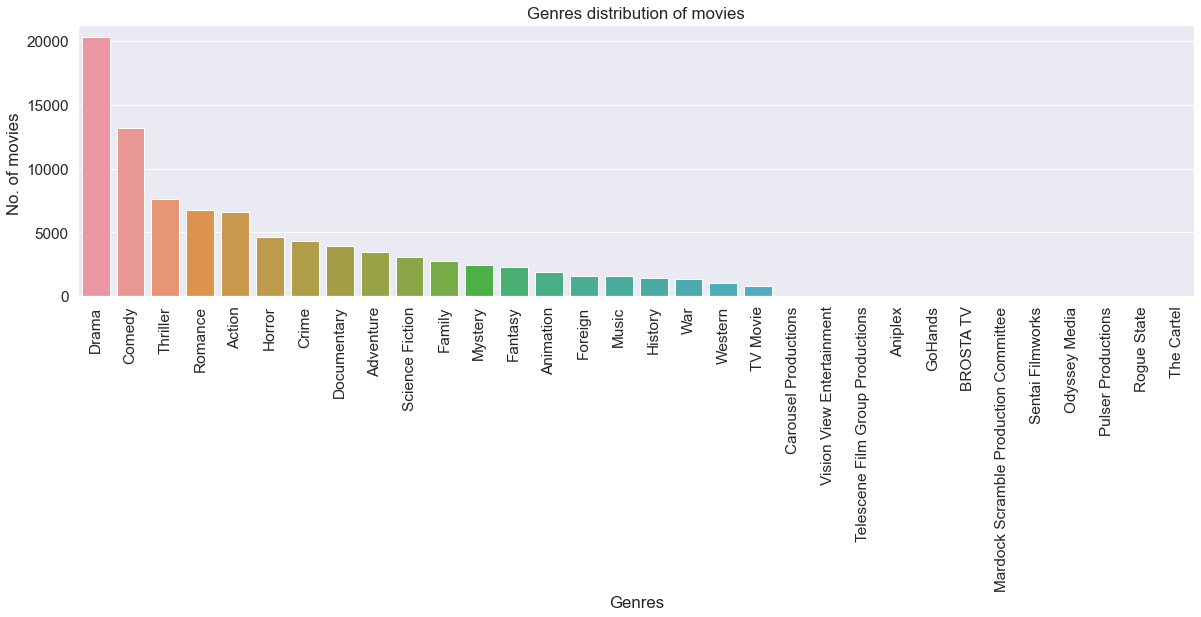

In [25]:
fig = plt.figure(figsize = (20, 5))
all_genre_keys = list(all_genres.keys())
all_genre_values = [int(i) for i in all_genres.values()]
sns.barplot(x=all_genre_keys, y = all_genre_values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('No. of movies ')
plt.title('Genres distribution of movies')
plt.show()

In [26]:
data.drop(['homepage', 'imdb_id'], axis=1, inplace=True)
data.shape

(45453, 19)

# No. of movies made in each language

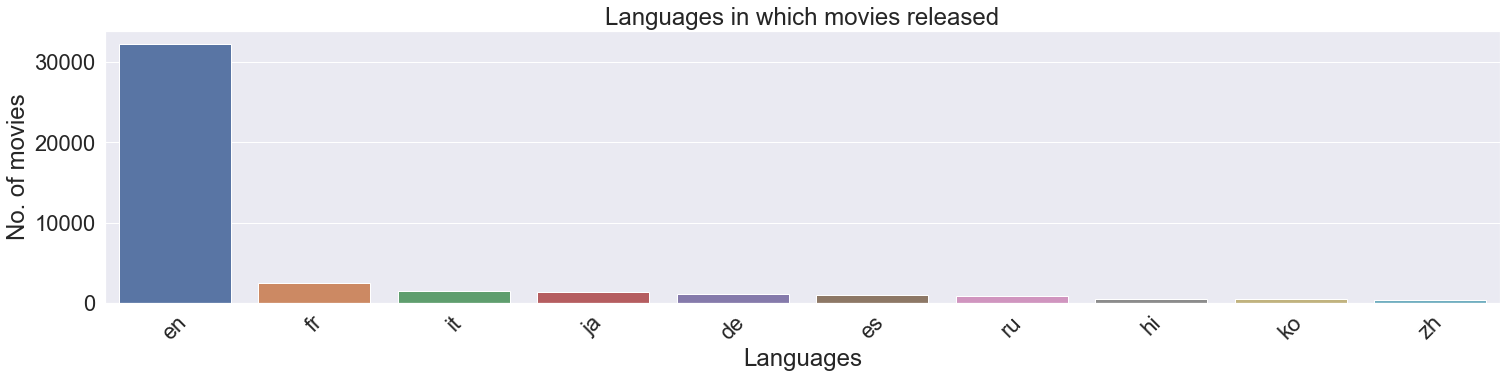

In [27]:
sns.set(font_scale=2)
lang_name = data['original_language'].value_counts().index.tolist()[0:10]
lang_count = data['original_language'].value_counts().tolist()[0:10]
fig = plt.figure(figsize = (25, 5))
sns.barplot(x=lang_name, y=lang_count)
plt.xticks(rotation=45)
plt.xlabel('Languages')
plt.ylabel('No. of movies')
plt.title('Languages in which movies released')
plt.show()

In [28]:
sns.set(font_scale=1.4)

In [29]:
data.drop(['original_title'], axis=1, inplace=True)
data.shape

(45453, 18)

In [30]:
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

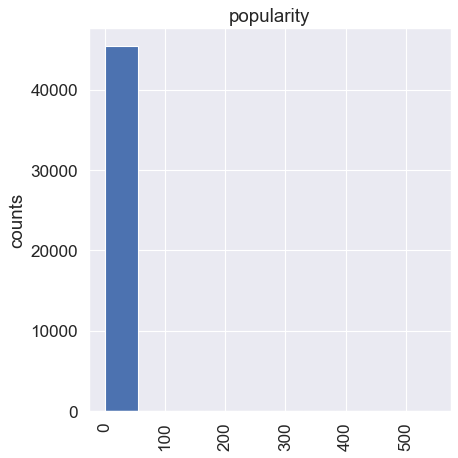

In [31]:
dist_graphs(data[['popularity']], 1, 1)

In [32]:
data.drop(['popularity'], axis=1, inplace=True)
data.shape

(45453, 17)

In [33]:
data.drop(['production_companies', 'production_countries'], axis=1, inplace=True)
data.shape

(45453, 15)

# Datetime

In [34]:
data['release_date'].isna().sum()

87

In [35]:
data.shape

(45453, 15)

In [36]:
data = data[~data['release_date'].isna()]

In [37]:
data.shape

(45366, 15)

In [38]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def get_day(x):
    try:  
        answer = x.weekday()
        return day_order[answer]
    except:
        return np.nan

In [39]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [40]:
data['release_year'] = data['release_date'].dt.year
data['release_month'] = data['release_date'].dt.month
data['realease_day'] = data['release_date'].apply(get_day)

# No. of movies released each year

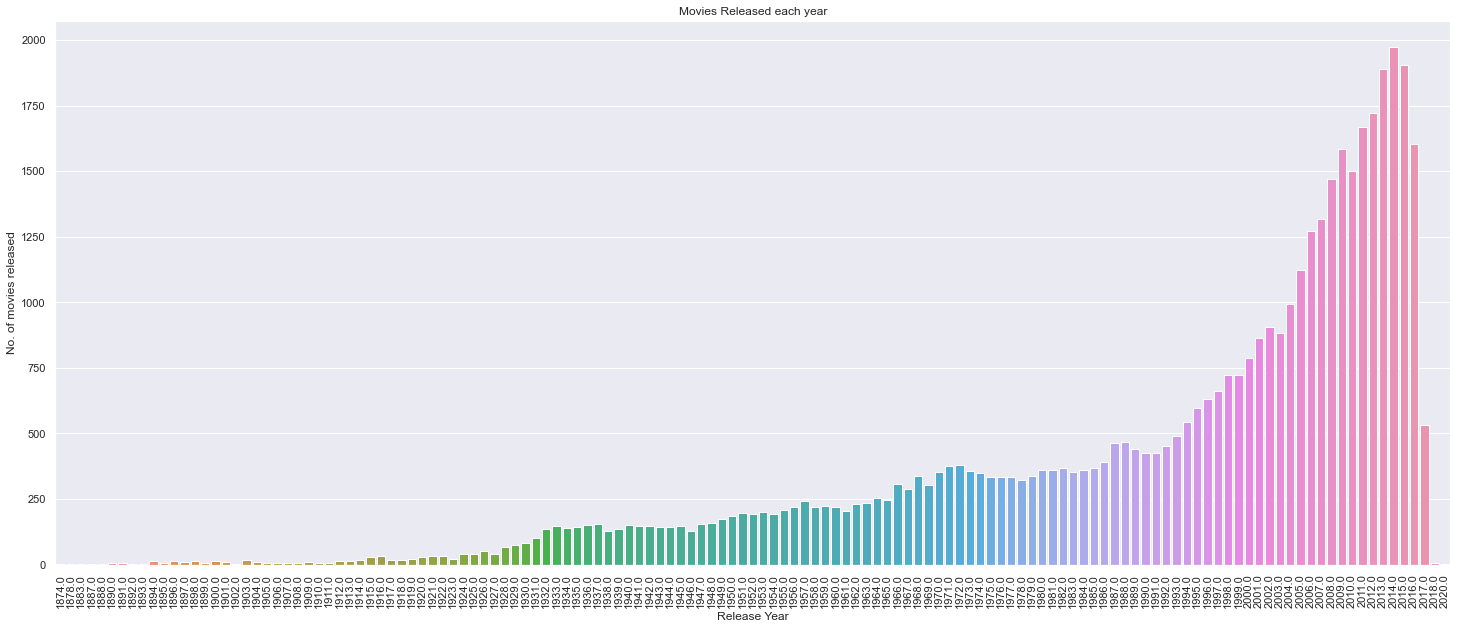

In [41]:
sns.set(font_scale=1)
year_name = data['release_year'].value_counts().index.tolist()
year_count = data['release_year'].value_counts().tolist()
fig = plt.figure(figsize = (25, 10))
sns.barplot(x=year_name, y=year_count)
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.ylabel('No. of movies released')
plt.title('Movies Released each year')
plt.show()

In [42]:
sns.set(font_scale=1.4)

# No. of movies released on each weekday

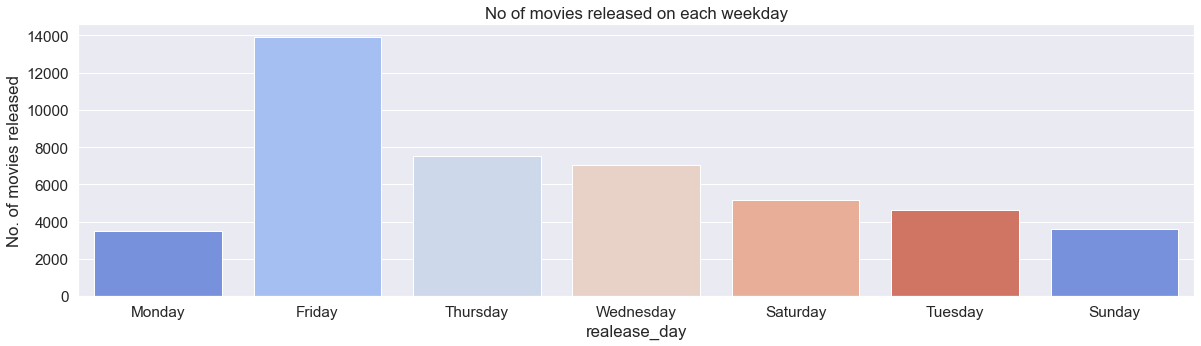

In [43]:
plt.figure(figsize=(20, 5))
sns.countplot(x='realease_day', data=data, palette=sns.color_palette("coolwarm"))
plt.ylabel('No. of movies released')
plt.title('No of movies released on each weekday')
plt.show()

# No. of movies released on each month

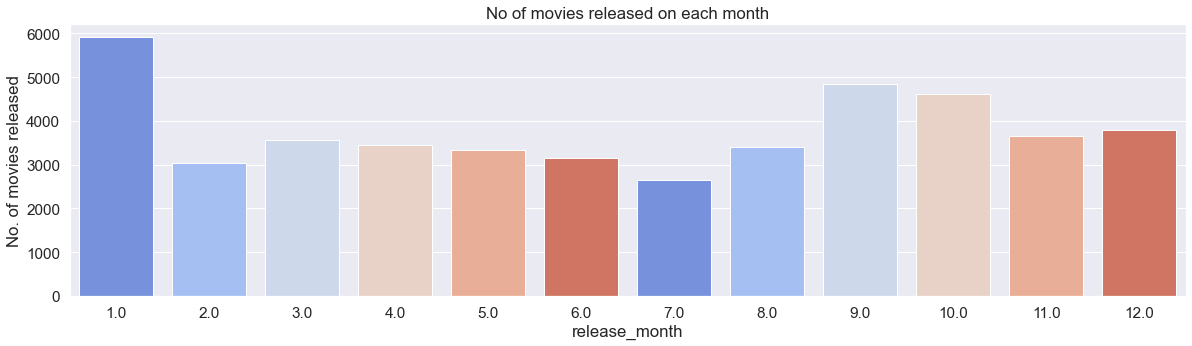

In [44]:
plt.figure(figsize=(20, 5))
sns.countplot(x='release_month', data=data, palette=sns.color_palette("coolwarm"))
plt.ylabel('No. of movies released')
plt.title('No of movies released on each month')
plt.show()

Cleaning data a little bit

In [45]:
data.drop(['release_month', 'release_date', 'realease_day'], axis=1, inplace=True)
data.shape

(45366, 15)

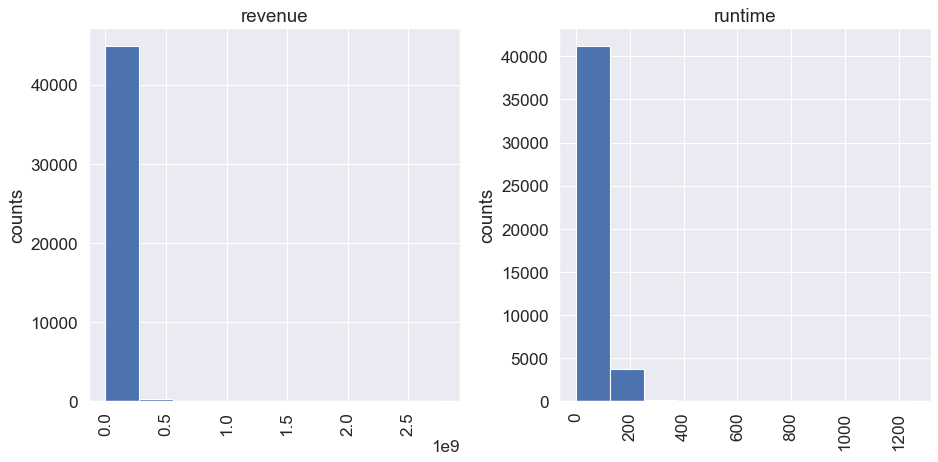

In [46]:
dist_graphs(data[['revenue', 'runtime']], 2, 2)

In [47]:
data[['revenue', 'runtime']].isna().sum()

revenue      3
runtime    249
dtype: int64

In [48]:
len(data[data['revenue'] == 0])

37958

In [49]:
len(data[data['runtime'] == 0])

1535

# Revenue of movies in each year

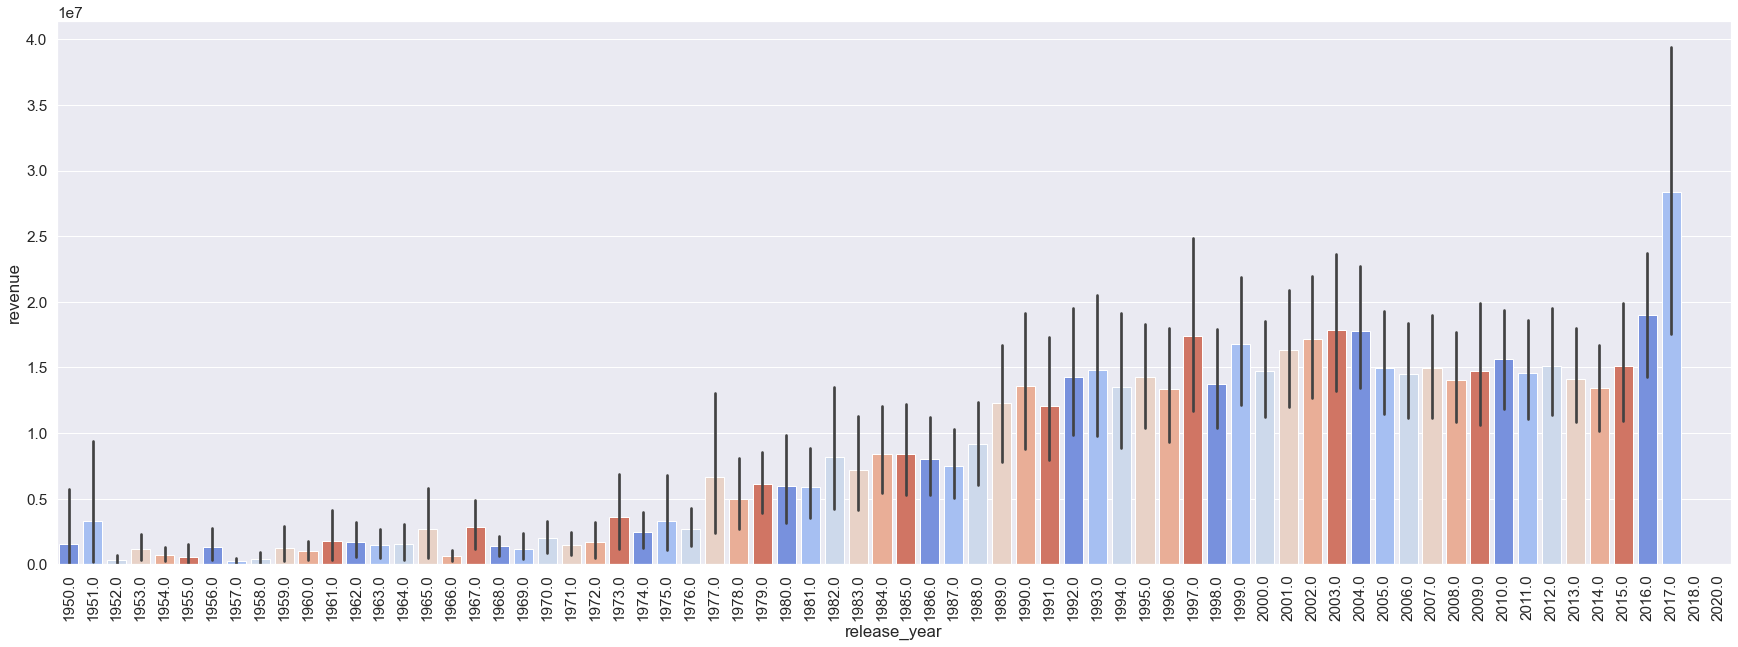

In [50]:
plt.figure(figsize=(30,10))
sns.barplot(data=data[data['release_year'] >= 1950], x='release_year', y='revenue', palette = sns.color_palette("coolwarm"))
plt.xticks(rotation=90)
plt.show()

# Change in movies runtime with year

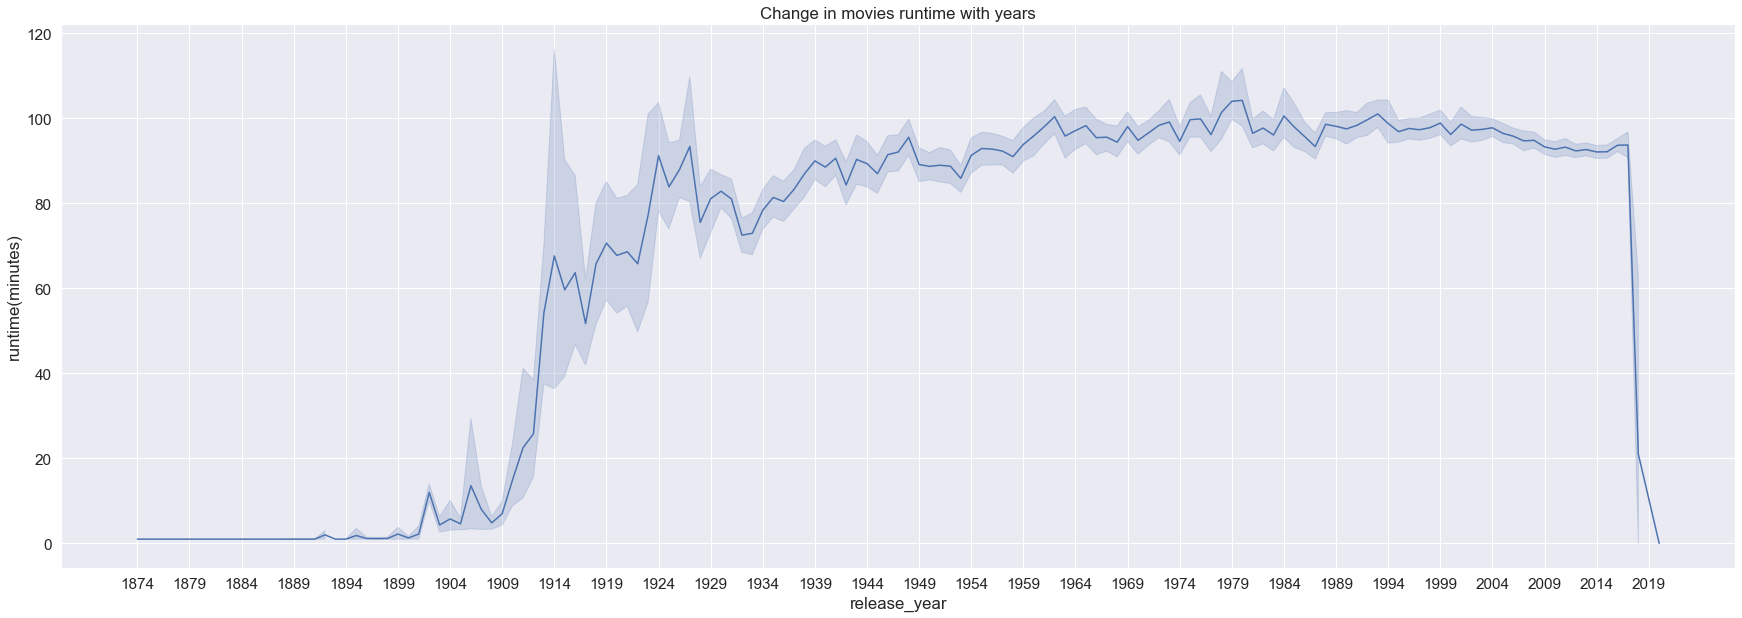

In [51]:
fig = plt.figure(figsize=(30, 10))
sns.lineplot(data=data, x='release_year', y='runtime')
plt.ylabel('runtime(minutes)')
plt.xticks(np.arange(1874, 2024, 5.0))
plt.title('Change in movies runtime with years')
plt.show()

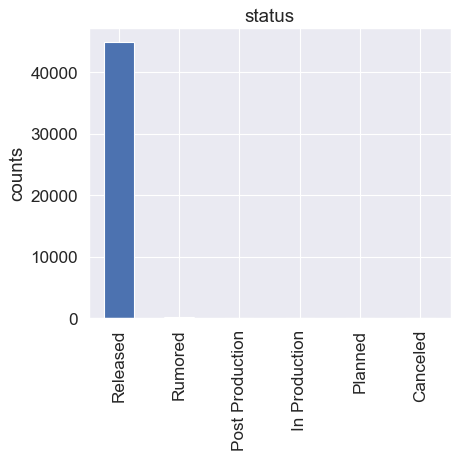

In [52]:
dist_graphs(data[['status']], 1, 1)

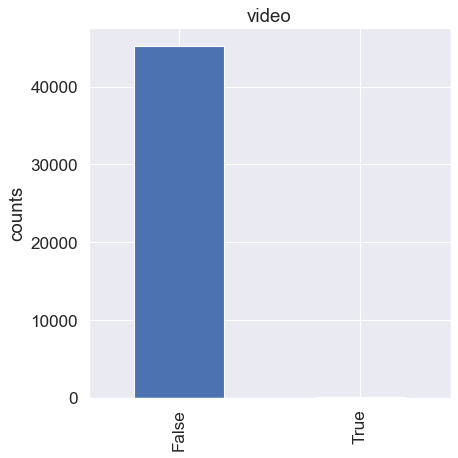

In [53]:
dist_graphs(data[['video']], 1, 1)

In [54]:
data.drop(['revenue', 'runtime', 'spoken_languages', 'status', 'video', ], axis=1, inplace=True)
data.shape

(45366, 10)

In [55]:
data.drop(['tagline'], axis=1, inplace=True)

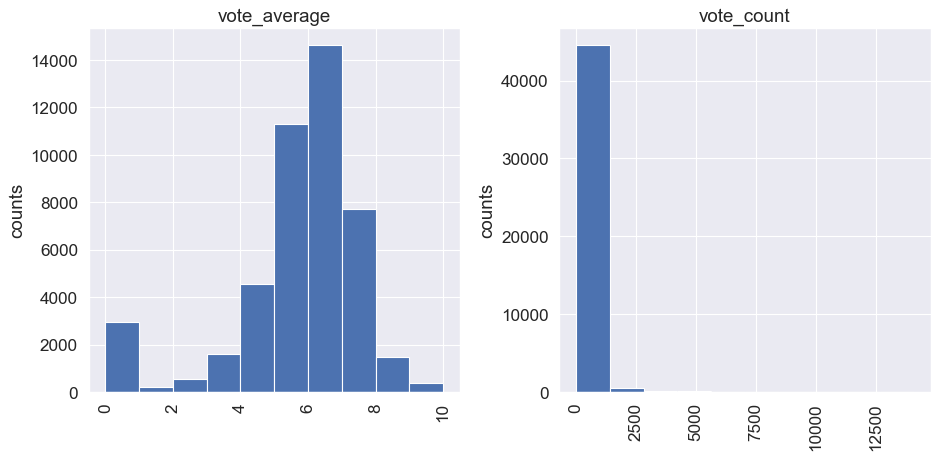

In [56]:
dist_graphs(data[['vote_average', 'vote_count']], 2, 2)

In [57]:
data.drop(['vote_count', 'vote_average'], axis=1, inplace=True)
data.shape

(45366, 7)

In [58]:
data.head(2)

,genres,id,original_language,overview,poster_path,title,release_year
0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Toy Story,1995.0
1,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Jumanji,1995.0


# Loading Credits

In [59]:
credit_data = pd.read_csv('credits.csv')
credit_data.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [60]:
credit_data.shape

(45476, 3)

In [61]:
credit_data.duplicated().sum()

37

In [62]:
credit_data.drop_duplicates(inplace=True)
credit_data.shape

(45439, 3)

In [63]:
credit_data.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [64]:
def convert_cast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter += 1
    return L 

In [65]:
credit_data['cast'] = credit_data['cast'].apply(convert_cast)

In [67]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [68]:
credit_data['crew'] = credit_data['crew'].apply(fetch_director)

In [72]:
credit_data.head(2)

,cast,crew,id
0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],862
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],8844


### We just need cast and director

In [70]:
data['id'] = pd.to_numeric(data['id'], errors='coerce')

In [73]:
data = data.merge(credit_data, on='id')

In [74]:
data.head(3)

,genres,id,original_language,overview,poster_path,title,release_year,cast,crew
0,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Toy Story,1995.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]
1,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Jumanji,1995.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston]
2,"[Romance, Comedy]",15602.0,en,A family wedding reignites the ancient feud be...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Grumpier Old Men,1995.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch]


In [75]:
del credit_data

# Loading Keywords

In [76]:
keywords_data = pd.read_csv('keywords.csv')
keywords_data.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [77]:
keywords_data.isna().sum()

id          0
keywords    0
dtype: int64

In [78]:
keywords_data.duplicated().sum()

987

In [79]:
keywords_data.drop_duplicates(inplace=True)

In [80]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [81]:
keywords_data['keywords'] = keywords_data['keywords'].apply(convert)

In [82]:
keywords_data.head(2)

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."


In [83]:
data = data.merge(keywords_data, on='id')

In [84]:
data.head(2)

,genres,id,original_language,overview,poster_path,title,release_year,cast,crew,keywords
0,"[Animation, Comedy, Family]",862.0,en,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Toy Story,1995.0,"[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter],"[jealousy, toy, boy, friendship, friends, riva..."
1,"[Adventure, Fantasy, Family]",8844.0,en,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Jumanji,1995.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[board game, disappearance, based on children'..."


In [85]:
del keywords_data

In [86]:
data.shape

(45375, 10)

---
# Checking Dataset
* Missing Values
* Duplicated Values
* Reset index

In [90]:
data.isna().sum()

genres               2383
id                      0
original_language      11
overview              941
poster_path           339
title                   0
release_year            0
cast                    0
crew                    0
keywords                0
dtype: int64

In [91]:
data.dropna(inplace=True)

In [92]:
data.shape

(42132, 10)

Remove rows with duplicated id

In [103]:
data = data[~data[['id']].duplicated()]

In [104]:
data.shape

(42102, 10)

In [107]:
data = data.reset_index(drop=True)

### Saving dataset

In [119]:
data.to_csv('cleaned_data.csv')